# 1. Data Cleaning

#### Imports and constants

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from pathlib import Path
from datetime import datetime

# Geometry libraries
import geopandas as gpd
from shapely.geometry import Polygon, LineString, Point
import psycopg2

from sqlalchemy import create_engine

ROOT = Path.cwd()

#### Reading

In [2]:
DataDir = ROOT / "Data"
DataDir

WindowsPath('d:/00.Mis_Cosas/Universidad/Master/Q2/DMT/Project/Project2_Processing&Querying_TransportationData/Code/Data')

In [3]:
aisDF = pd.read_csv(DataDir / "ais.csv")
chlorophyllaDF = pd.read_csv(DataDir / "chlorophylla_012020-062020_res05.csv")
fishingDF = pd.read_csv(DataDir / "fishing.csv")
temperatureDF = pd.read_csv(DataDir / "temperature_012020-062020_res05.csv")

In [4]:
aisDF

,BoatName,BoatID,Date,Speed,Course,Latitude,Longitude
0,Korbin,113,2020-01-01 00:03:00,0,N,-38.894440,-62.101380
1,Rey,112,2020-01-01 00:03:00,"0,1",SE,-38.894720,-62.101380
2,Rey,112,2020-01-01 00:04:00,0,N,-38.894720,-62.101380
3,Rodney,115,2020-01-01 00:11:02,0,NO,-38.047459,-57.536480
4,Korbin,113,2020-01-01 00:18:00,0,N,-38.894440,-62.101380
...,...,...,...,...,...,...,...
81902,Rodney,115,2020-06-12 23:38:00,0,N,-38.045200,-57.539612
81903,Mason,111,2020-06-12 23:46:00,"0,1",NO,-38.789440,-62.275830
81904,Korbin,113,2020-06-12 23:47:00,"0,1",O,-38.894440,-62.100270
81905,Rey,112,2020-06-12 23:53:00,0,N,-38.894440,-62.100270


In [19]:
geoAisDF = gpd.GeoDataFrame(aisDF, geometry=gpd.points_from_xy(aisDF.Latitude, aisDF.Longitude)).set_crs("EPSG:3857")
geoAisDF

,BoatName,BoatID,Date,Speed,Course,Latitude,Longitude,geometry
0,Korbin,113,2020-01-01 00:03:00,0,N,-38.894440,-62.101380,POINT (-38.894 -62.101)
1,Rey,112,2020-01-01 00:03:00,"0,1",SE,-38.894720,-62.101380,POINT (-38.895 -62.101)
2,Rey,112,2020-01-01 00:04:00,0,N,-38.894720,-62.101380,POINT (-38.895 -62.101)
3,Rodney,115,2020-01-01 00:11:02,0,NO,-38.047459,-57.536480,POINT (-38.047 -57.536)
4,Korbin,113,2020-01-01 00:18:00,0,N,-38.894440,-62.101380,POINT (-38.894 -62.101)
...,...,...,...,...,...,...,...,...
81902,Rodney,115,2020-06-12 23:38:00,0,N,-38.045200,-57.539612,POINT (-38.045 -57.540)
81903,Mason,111,2020-06-12 23:46:00,"0,1",NO,-38.789440,-62.275830,POINT (-38.789 -62.276)
81904,Korbin,113,2020-06-12 23:47:00,"0,1",O,-38.894440,-62.100270,POINT (-38.894 -62.100)
81905,Rey,112,2020-06-12 23:53:00,0,N,-38.894440,-62.100270,POINT (-38.894 -62.100)


In [ ]:
fishingDF

,BoatName,BoatID,Trip,Day,Kg,Duration,Lines,Temperature,Latitude,Longitude
0,Mason,111,2020-1,2020-01-12,11492,12,60,14.5,-45.100000,-62.000000
1,Mason,111,2020-1,2020-01-13,10582,12,60,14.5,-45.033333,-62.100000
2,Mason,111,2020-1,2020-01-18,21164,12,60,13.5,-44.833333,-63.816667
3,Mason,111,2020-1,2020-01-19,18980,12,60,14.0,-44.833333,-63.833333
4,Mason,111,2020-1,2020-01-20,16796,12,60,13.7,-44.866667,-63.816667
...,...,...,...,...,...,...,...,...,...,...
639,Rodney,115,2020-5,2020-06-21,21790,12,100,11.0,-42.016667,-59.466667
640,Rodney,115,2020-5,2020-06-22,20410,12,100,11.2,-42.050000,-59.450000
641,Rodney,115,2020-5,2020-06-25,23330,12,100,10.3,-42.083333,-59.416667
642,Rodney,115,2020-5,2020-06-26,8120,12,100,10.9,-41.916667,-59.433333


In [18]:
geoFishingDF = gpd.GeoDataFrame(fishingDF, geometry=gpd.points_from_xy(fishingDF.Latitude, fishingDF.Longitude)).set_crs("EPSG:3857")
geoFishingDF

,BoatName,BoatID,Trip,Day,Kg,Duration,Lines,Temperature,Latitude,Longitude,geometry
0,Mason,111,2020-1,2020-01-12,11492,12,60,14.5,-45.100000,-62.000000,POINT (-45.100 -62.000)
1,Mason,111,2020-1,2020-01-13,10582,12,60,14.5,-45.033333,-62.100000,POINT (-45.033 -62.100)
2,Mason,111,2020-1,2020-01-18,21164,12,60,13.5,-44.833333,-63.816667,POINT (-44.833 -63.817)
3,Mason,111,2020-1,2020-01-19,18980,12,60,14.0,-44.833333,-63.833333,POINT (-44.833 -63.833)
4,Mason,111,2020-1,2020-01-20,16796,12,60,13.7,-44.866667,-63.816667,POINT (-44.867 -63.817)
...,...,...,...,...,...,...,...,...,...,...,...
639,Rodney,115,2020-5,2020-06-21,21790,12,100,11.0,-42.016667,-59.466667,POINT (-42.017 -59.467)
640,Rodney,115,2020-5,2020-06-22,20410,12,100,11.2,-42.050000,-59.450000,POINT (-42.050 -59.450)
641,Rodney,115,2020-5,2020-06-25,23330,12,100,10.3,-42.083333,-59.416667,POINT (-42.083 -59.417)
642,Rodney,115,2020-5,2020-06-26,8120,12,100,10.9,-41.916667,-59.433333,POINT (-41.917 -59.433)


In [5]:
chlorophyllaDF

,time,latitude,longitude,chlor_a
0,2020-01-01,-35.25,-69.75,NaN
1,2020-01-01,-35.25,-69.25,NaN
2,2020-01-01,-35.25,-68.75,NaN
3,2020-01-01,-35.25,-68.25,NaN
4,2020-01-01,-35.25,-67.75,NaN
...,...,...,...,...
218395,2020-06-30,-49.75,-52.25,NaN
218396,2020-06-30,-49.75,-51.75,NaN
218397,2020-06-30,-49.75,-51.25,NaN
218398,2020-06-30,-49.75,-50.75,NaN


In [7]:
temperatureDF

,time,latitude,longitude,temperature,partOfTheDay
0,2020-01-01,-35.25,-69.75,NaN,day
1,2020-01-01,-35.25,-69.25,NaN,day
2,2020-01-01,-35.25,-68.75,NaN,day
3,2020-01-01,-35.25,-68.25,NaN,day
4,2020-01-01,-35.25,-67.75,NaN,day
...,...,...,...,...,...
436795,2020-06-30,-49.75,-52.25,276.98440,night
436796,2020-06-30,-49.75,-51.75,275.71692,night
436797,2020-06-30,-49.75,-51.25,276.07935,night
436798,2020-06-30,-49.75,-50.75,275.07680,night


## 1A. Missing Values
Calculate and report the % of missing values for temperature and chlorophyll data sets

### Percentage of missing values for the temperature dataset

In [20]:
temperatureNA = temperatureDF.isnull().sum()
temperatureNA

time                 0
latitude             0
longitude            0
temperature     208824
partOfTheDay         0
dtype: int64

As we can see in the previous piece of code, the column temperature is the only one that has missing values

In [21]:
totalTemperatureNA = temperatureNA.sum()
totalTemperatureNA # Total number of missing values

208824

In [7]:
rowsTemp = temperatureDF.shape[0]
columnsTemp = temperatureDF.shape[1]

totalTemp = rowsTemp*columnsTemp
totalTemp # Total number of elements

2184000

In [8]:
temp_percentage = round((temperatureNA["temperature"] / rowsTemp) *100,  2)
print("Percentage of missing values on temperature column: {}%".format(temp_percentage))

tempDS_percentage = round((totalTemperatureNA / totalTemp) *100,  2)
print("Percentage of missing values on temperature dataset: {}%".format(tempDS_percentage))

Percentage of missing values on temperature column: 47.81%
Percentage of missing values on temperature dataset: 9.56%


### Percentage of missing values for the chlorophyll dataset

In [9]:
chlorophyllNA = chlorophyllaDF.isnull().sum()
chlorophyllNA

time              0
latitude          0
longitude         0
chlor_a      118184
dtype: int64

In the same way as with the temperature, we only have one column with missing values.

In [10]:
totalchlorophyllNA = chlorophyllNA.sum()
totalchlorophyllNA # Total number of missing values

118184

In [11]:
rowsChlor = chlorophyllaDF.shape[0]
columnsChlor = chlorophyllaDF.shape[1]

totalChlor = rowsChlor*columnsChlor
totalChlor # Total number of elements

873600

In [12]:
chlor_percentage = round((chlorophyllNA["chlor_a"] / rowsChlor) *100,  2)
print("Percentage of missing values on chlor_a column: {}%".format(chlor_percentage))

chlorDS_percentage = round((totalchlorophyllNA / totalChlor) *100,  2)
print("Percentage of missing values on chlorophyll dataset: {}%".format(chlorDS_percentage))

Percentage of missing values on chlor_a column: 54.11%
Percentage of missing values on chlorophyll dataset: 13.53%


In [13]:
totalNA_percentage = round(((totalchlorophyllNA + totalTemperatureNA) / (totalChlor + totalTemp)) *100,  2)
print("Total percentage of missing values on datasets: {}%".format(totalNA_percentage))

Total percentage of missing values on datasets: 10.69%


We can conclude that half of our values for **temperature** and **clorophyll** are missing. (**47.81%** and **54.11%**, respectively).

That represents a **9.56%** and a **13.53%** of missing values for the **temperature dataset** and the **clorophyll dataset**.

We have an overall of **10.59%** of missing values.

## 1B. Missing Values Imputation
Impute missing values for the temperature and clorophyll data sets.
* For example, taking the average of the +/- 3days (fell free to propose other ways to impute the missing values).

We can use mean/median imputation or try to use some kind of correlation but since 

In [14]:
temperatureDF_DropNA = temperatureDF.dropna()
temperatureDF_DropNA

,time,latitude,longitude,temperature,partOfTheDay
26,2020-01-01,-35.25,-56.75,295.59412,day
27,2020-01-01,-35.25,-56.25,295.51132,day
29,2020-01-01,-35.25,-55.25,293.56778,day
30,2020-01-01,-35.25,-54.75,292.49487,day
31,2020-01-01,-35.25,-54.25,291.35140,day
...,...,...,...,...,...
436795,2020-06-30,-49.75,-52.25,276.98440,night
436796,2020-06-30,-49.75,-51.75,275.71692,night
436797,2020-06-30,-49.75,-51.25,276.07935,night
436798,2020-06-30,-49.75,-50.75,275.07680,night


array([[<AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'temperature'}>, <AxesSubplot:>]],
      dtype=object)

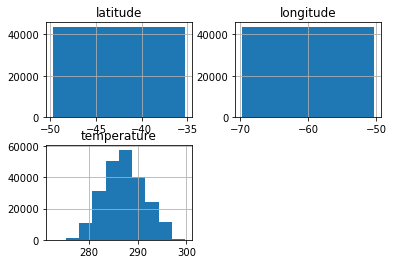

In [46]:
temperatureDF.hist()

array([[<AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'temperature'}>, <AxesSubplot:>]],
      dtype=object)

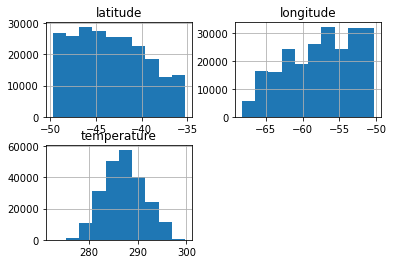

In [45]:
temperatureDF_DropNA.hist()

We can notice that we have more NA in latitude values near to -35 and longitude values near -65

In [49]:
corr = temperatureDF.corr(method='spearman')
matrix = np.triu(corr)
corr

,latitude,longitude,temperature
latitude,1.000000,0.00000,0.732936
longitude,0.000000,1.00000,0.269710
temperature,0.732936,0.26971,1.000000


<AxesSubplot:>

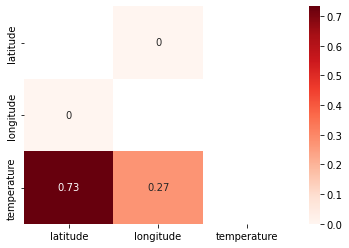

In [50]:
sns.heatmap(corr, annot=True, cmap="Reds", mask=matrix)

The heatmap shows us that the temperature is strongly correlated with latitude and weakly correlated with longitude (both positive). We can use these relations in order to make a imputation taking into account the correlated variables.

In [21]:
stats.kendalltau(temperatureDF_DropNA['temperature'], temperatureDF_DropNA['partOfTheDay'])

KendalltauResult(correlation=-0.0016320705867739545, pvalue=0.3398852836331612)

In [51]:
stats.kendalltau(temperatureDF_DropNA['temperature'], temperatureDF_DropNA['time'])

KendalltauResult(correlation=-0.252934211499414, pvalue=0.0)

We cannot use 'partOfTheDay' since pvalue > 0.05, this means that variables are not correlated, but 'time' seems to be weakly correlated.

We can use the library fancyimput in order to use some machine learning algorithms that take into account the correlation between variables (like KNN or MICE), but I prefer to follow the recomendation and do it manually.

#### Imputation

In [124]:
temperatureDFAggregation = temperatureDF[['time','temperature','partOfTheDay']]
tempAgg = temperatureDFAggregation.groupby(['time', 'partOfTheDay']).mean()
tempAgg = tempAgg.reset_index().sort_values(by=['partOfTheDay', 'time'])
tempAgg = tempAgg.reset_index(drop=True)

#tempAgg['day'] = (tempAgg['time'].str[8:10]).astype(int) * (tempAgg['time'].str[5:7]).astype(int)
tempAgg['day'] = [datetime.strptime(x, '%Y-%m-%d').timetuple().tm_yday for x in tempAgg['time']]
tempAgg



,time,partOfTheDay,temperature,day
0,2020-01-01,day,287.664967,1
1,2020-01-02,day,288.129139,2
2,2020-01-03,day,288.393045,3
3,2020-01-04,day,288.489332,4
4,2020-01-05,day,287.564157,5
...,...,...,...,...
359,2020-06-26,night,283.341314,178
360,2020-06-27,night,283.152934,179
361,2020-06-28,night,283.047590,180
362,2020-06-29,night,283.389708,181


In [123]:
chlorophyllDFAggregation = chlorophyllaDF[['time','chlor_a']]
chlorAgg = chlorophyllDFAggregation.groupby(['time']).mean()
chlorAgg = chlorAgg.reset_index().sort_values(by=['time'])
chlorAgg


chlorAgg['day'] = [datetime.strptime(x, '%Y-%m-%d').timetuple().tm_yday for x in chlorAgg['time']]
chlorAgg


,time,chlor_a,day
0,2020-01-01,0.956769,1
1,2020-01-02,1.039513,2
2,2020-01-03,1.025671,3
3,2020-01-04,1.124476,4
4,2020-01-05,1.058240,5
...,...,...,...
177,2020-06-26,1.195825,178
178,2020-06-27,1.268297,179
179,2020-06-28,0.848200,180
180,2020-06-29,1.623759,181


It seems that we have all the needed days (with the average values), since we have 182 days in chlorophyll dataset and 364 (182*2) in temperature dataset (the double since we have day and night values).

In [125]:
tempWithYDay = temperatureDF.copy()

# Generate the year day from the time column
tempWithYDay['day'] = [datetime.strptime(x, '%Y-%m-%d').timetuple().tm_yday for x in tempWithYDay['time']]
  
tempWithYDay

,time,latitude,longitude,temperature,partOfTheDay,day
0,2020-01-01,-35.25,-69.75,NaN,day,1
1,2020-01-01,-35.25,-69.25,NaN,day,1
2,2020-01-01,-35.25,-68.75,NaN,day,1
3,2020-01-01,-35.25,-68.25,NaN,day,1
4,2020-01-01,-35.25,-67.75,NaN,day,1
...,...,...,...,...,...,...
436795,2020-06-30,-49.75,-52.25,276.98440,night,182
436796,2020-06-30,-49.75,-51.75,275.71692,night,182
436797,2020-06-30,-49.75,-51.25,276.07935,night,182
436798,2020-06-30,-49.75,-50.75,275.07680,night,182


In [149]:
chlorWithYDay = chlorophyllaDF.copy()

# Generate the year day from the time column
chlorWithYDay['day'] = [datetime.strptime(x, '%Y-%m-%d').timetuple().tm_yday for x in chlorWithYDay['time']]
  
chlorWithYDay

,time,latitude,longitude,chlor_a,day
0,2020-01-01,-35.25,-69.75,NaN,1
1,2020-01-01,-35.25,-69.25,NaN,1
2,2020-01-01,-35.25,-68.75,NaN,1
3,2020-01-01,-35.25,-68.25,NaN,1
4,2020-01-01,-35.25,-67.75,NaN,1
...,...,...,...,...,...
218395,2020-06-30,-49.75,-52.25,NaN,182
218396,2020-06-30,-49.75,-51.75,NaN,182
218397,2020-06-30,-49.75,-51.25,NaN,182
218398,2020-06-30,-49.75,-50.75,NaN,182


In [179]:
if (np.isnan(tempWithYDay['temperature'][0])):
    day = tempWithYDay['day'][54324]
    #isDay = True if tempWithDayMonth['partOfTheDay'][0] == 'day' else False
    part = tempWithYDay['partOfTheDay'][54324]
    days = [day-3, day-2, day-1, day, day+1, day+2, day+3]

    if day < 4:
        days = [x for x in days if x > 0]
    
    aux = tempAgg[(tempAgg['day'].isin(days)) & (tempAgg['partOfTheDay'] == part)]
    avgTemp = aux['temperature'].sum() / aux.shape[0]

print(round(avgTemp, 2))

288.46


In [192]:
for index, _ in tempWithYDay.iterrows():
    if (np.isnan(tempWithYDay['temperature'][index])):
        day = tempWithYDay['day'][index]
        part = tempWithYDay['partOfTheDay'][index]
        days = [day-3, day-2, day-1, day, day+1, day+2, day+3]

        if day < 4:
            days = [x for x in days if x > 0]
        
        aux = tempAgg[(tempAgg['day'].isin(days)) & (tempAgg['partOfTheDay'] == part)]
        tempWithYDay['temperature'] = aux['temperature'].sum() / aux.shape[0]

tempWithYDay['temperature'] = tempWithYDay['temperature'].round(decimals=6)
        

In [190]:
for index, _ in chlorWithYDay.iterrows():
    if (np.isnan(chlorWithYDay['chlor_a'][index])):
        day = chlorWithYDay['day'][index]
        days = [day-3, day-2, day-1, day, day+1, day+2, day+3]

        if day < 4:
            days = [x for x in days if x > 0]
        
        aux = chlorAgg[chlorAgg['day'].isin(days)]
        chlorWithYDay['chlor_a'] = aux['chlor_a'].sum() / aux.shape[0]

chlorWithYDay['chlor_a'] = chlorWithYDay['chlor_a'].round(decimals=2)

In [194]:
tempWithYDay.isnull().sum() # OK

time            0
latitude        0
longitude       0
temperature     0
partOfTheDay    0
day             0
dtype: int64

In [195]:
chlorWithYDay.isnull().sum() # OK

time         0
latitude     0
longitude    0
chlor_a      0
day          0
dtype: int64

We have checked that we don't have NaNs anymore

In [196]:
clean_temperatureDF = tempWithYDay.copy().iloc[:, 0:5]
clean_temperatureDF

,time,latitude,longitude,temperature,partOfTheDay
0,2020-01-01,-35.25,-69.75,288.169121,day
1,2020-01-01,-35.25,-69.25,288.169121,day
2,2020-01-01,-35.25,-68.75,288.169121,day
3,2020-01-01,-35.25,-68.25,288.169121,day
4,2020-01-01,-35.25,-67.75,288.169121,day
...,...,...,...,...,...
436795,2020-06-30,-49.75,-52.25,288.169121,night
436796,2020-06-30,-49.75,-51.75,288.169121,night
436797,2020-06-30,-49.75,-51.25,288.169121,night
436798,2020-06-30,-49.75,-50.75,288.169121,night


In [197]:
clean_chlorophyllDF = chlorWithYDay.copy().iloc[:, 0:4]
clean_chlorophyllDF

,time,latitude,longitude,chlor_a
0,2020-01-01,-35.25,-69.75,1.04
1,2020-01-01,-35.25,-69.25,1.04
2,2020-01-01,-35.25,-68.75,1.04
3,2020-01-01,-35.25,-68.25,1.04
4,2020-01-01,-35.25,-67.75,1.04
...,...,...,...,...
218395,2020-06-30,-49.75,-52.25,1.04
218396,2020-06-30,-49.75,-51.75,1.04
218397,2020-06-30,-49.75,-51.25,1.04
218398,2020-06-30,-49.75,-50.75,1.04


In [198]:
clean_temperatureDF.to_csv(DataDir / "clean_temperature.csv", index=False)
clean_chlorophyllDF.to_csv(DataDir / "clean_chlorophyll.csv", index=False)

## 1C. Sampling frequency
Reduce the sampling frequency of AIS data making an effectiuve trade off with the precision of the resulting trajectories.

We create a new dataframe ignoring the **Speed** and the **Course**. Also I transform the Date string to a Timestamp.

In [313]:
aisResample = aisDF.copy()
aisResample["Date"] = pd.to_datetime(aisResample["Date"])
aisResample["Date"] = [pd.Timestamp(x) for x in aisResample["Date"]]

aisResample = aisResample[["BoatName","BoatID", "Date", "Latitude", "Longitude"]]

aisResample.dtypes
#K.groupby(['latitude','longitude'])

BoatName             object
BoatID                int64
Date         datetime64[ns]
Latitude            float64
Longitude           float64
dtype: object

I round the timestamp to hour level (round down). These new values let me aggregate in the following steps.

In [314]:
aisResample['Date'] = [x.floor(freq='H') for x in aisResample['Date']]

In [315]:
aisResample

,BoatName,BoatID,Date,Latitude,Longitude
0,Korbin,113,2020-01-01 00:00:00,-38.894440,-62.101380
1,Rey,112,2020-01-01 00:00:00,-38.894720,-62.101380
2,Rey,112,2020-01-01 00:00:00,-38.894720,-62.101380
3,Rodney,115,2020-01-01 00:00:00,-38.047459,-57.536480
4,Korbin,113,2020-01-01 00:00:00,-38.894440,-62.101380
...,...,...,...,...,...
81902,Rodney,115,2020-06-12 23:00:00,-38.045200,-57.539612
81903,Mason,111,2020-06-12 23:00:00,-38.789440,-62.275830
81904,Korbin,113,2020-06-12 23:00:00,-38.894440,-62.100270
81905,Rey,112,2020-06-12 23:00:00,-38.894440,-62.100270


I use groupby in order to aggregate the latitude and longitude using the mean.

In [318]:
ais_res = aisResample.groupby(['BoatName', 'BoatID', 'Date']).agg({'Latitude': 'mean', 'Longitude': 'mean'})
ais_res = ais_res.reset_index().sort_values(by=['BoatID', 'Date'])
ais_res

,BoatName,BoatID,Date,Latitude,Longitude
7007,Mason,111,2020-01-01 08:00:00,-38.035000,-57.527770
7008,Mason,111,2020-01-01 12:00:00,-38.035270,-57.527770
7009,Mason,111,2020-01-02 08:00:00,-38.035000,-57.527770
7010,Mason,111,2020-01-02 12:00:00,-38.035000,-57.527770
7011,Mason,111,2020-01-02 23:00:00,-38.035000,-57.527770
...,...,...,...,...,...
17664,Rodney,115,2020-06-12 19:00:00,-38.045196,-57.539603
17665,Rodney,115,2020-06-12 20:00:00,-38.045186,-57.539600
17666,Rodney,115,2020-06-12 21:00:00,-38.045160,-57.539613
17667,Rodney,115,2020-06-12 22:00:00,-38.045169,-57.539603


In [319]:
ais_res.to_csv(DataDir / "clean_ais.csv", index=False)